In [63]:
# Mount Google Drive to access dataset files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Define paths to the training, validation, and test datasets
train_folder = 'E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\train'
test_folder = 'E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\test'
validate_folder = 'E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\valid'

# Define paths to the specific classes within the dataset
normal_folder = '/normal'
adenocarcinoma_folder = '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
large_cell_carcinoma_folder = '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
squamous_cell_carcinoma_folder = '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'


In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import utils

print("Libraries Imported")

# Set the image size for resizing
IMAGE_SIZE = (350, 350)

# Initialize the image data generators for training and testing
print("Reading training images from:", train_folder)
print("Reading validation images from:", validate_folder)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


# Define the batch size for training
batch_size = 8


# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)


# Create the validation data generator
validation_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)


Libraries Imported
Reading training images from: E:\usueles but use full\ayush\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\dataset\train
Reading validation images from: E:\usueles but use full\ayush\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\dataset\valid
Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [17]:
pip install keras==2.15.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import keras
print(keras.__version__)

3.6.0


In [19]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Define callbacks
learning_rate_reduction = ReduceLROnPlateau(
    monitor='loss',
    patience=5,
    verbose=2,
    factor=0.5,
    min_lr=1e-6
)

early_stops = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=6,
    verbose=2,
    mode='auto'
)

checkpointer = ModelCheckpoint(
    filepath='best_model.hdf5',
    verbose=2,
    save_best_only=True,
    save_weights_only=True
)


ImportError: cannot import name 'BackupAndRestoreExperimental' from 'keras.src.callbacks' (c:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\__init__.py)

In [20]:
# Define the number of output classes
OUTPUT_SIZE = 4

# Load a pre-trained model (Xception) without the top layers and freeze its weights
pretrained_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False

# Create a new model with the pre-trained base and additional layers for classification
model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(OUTPUT_SIZE, activation='softmax'))

print("Pretrained model used:")
pretrained_model.summary()

print("Final model created:")
model.summary()

# Compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Pretrained model used:


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 350, 350,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 174, 174,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 174, 174,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 174, 174,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 172, 172,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 172, 172,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 172, 172,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 172, 172,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 172, 172,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 172, 172,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 172, 172,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 172, 172,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 86, 86,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 86, 86,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 86, 86,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 86, 86,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 86, 86,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Final model created:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 11, 11, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,869,676 (79.61 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [22]:
import numpy as np
import tensorflow as tf

# Assuming `model` is already defined and compiled
# train_generator and validation_generator are assumed to be your data generators

# Parameters
epochs = 50
patience_lr = 5
patience_es = 6
factor = 0.5
min_lr = 1e-6
best_loss = float('inf')
wait_lr = 0
wait_es = 0

for epoch in range(epochs):
    # Train for one epoch
    history = model.fit(
        train_generator,
        steps_per_epoch=25,
        epochs=1,  # Train for one epoch at a time
        validation_data=validation_generator,
        validation_steps=20,
        verbose=2
    )

    current_loss = history.history['loss'][0]
    print(f"Epoch {epoch + 1}, Loss: {current_loss}")

    # Check for early stopping
    if current_loss < best_loss:
        best_loss = current_loss
        wait_es = 0
        model.save_weights('best_model.weights.h5')  # Save best weights
    else:
        wait_es += 1
        if wait_es >= patience_es:
            print("Early stopping triggered")
            break

    # Check for learning rate reduction
    if current_loss > best_loss:
        wait_lr += 1
        if wait_lr >= patience_lr:
            new_lr = max(model.optimizer.learning_rate * factor, min_lr)
            model.optimizer.learning_rate.assign(new_lr)
            print(f"Learning rate reduced to {new_lr:.6f}")
            wait_lr = 0
    else:
        wait_lr = 0

# Final training and validation accuracy
final_training_accuracy = history.history['accuracy'][-1]
final_validation_accuracy = history.history['val_accuracy'][-1]

print("Final training accuracy =", final_training_accuracy)
print("Final validation accuracy =", final_validation_accuracy)


25/25 - 90s - 4s/step - accuracy: 0.5431 - loss: 1.0240 - val_accuracy: 0.5250 - val_loss: 1.0532
Epoch 1, Loss: 1.0240402221679688
25/25 - 92s - 4s/step - accuracy: 0.6700 - loss: 0.8877 - val_accuracy: 0.5125 - val_loss: 1.0068
Epoch 2, Loss: 0.887749195098877
25/25 - 84s - 3s/step - accuracy: 0.6600 - loss: 0.8403 - val_accuracy: 0.5375 - val_loss: 1.0245
Epoch 3, Loss: 0.840285062789917
25/25 - 85s - 3s/step - accuracy: 0.6850 - loss: 0.8021 - val_accuracy: 0.5813 - val_loss: 0.8756
Epoch 4, Loss: 0.8020535111427307
25/25 - 83s - 3s/step - accuracy: 0.6802 - loss: 0.7728 - val_accuracy: 0.5562 - val_loss: 0.9423
Epoch 5, Loss: 0.7728310227394104
25/25 - 70s - 3s/step - accuracy: 0.6954 - loss: 0.7345 - val_accuracy: 0.6125 - val_loss: 0.8271
Epoch 6, Loss: 0.7345148921012878
25/25 - 66s - 3s/step - accuracy: 0.7350 - loss: 0.6918 - val_accuracy: 0.6125 - val_loss: 0.8099
Epoch 7, Loss: 0.6917922496795654
25/25 - 67s - 3s/step - accuracy: 0.7665 - loss: 0.6951 - val_accuracy: 0.6375

In [68]:
# # Train the model with the training and validation data generators
# history = model.fit(
#     train_generator,
#     steps_per_epoch=25,
#     epochs=50,
#     callbacks=[learning_rate_reduction, early_stops, checkpointer],
#     validation_data=validation_generator,
#     validation_steps=20   
# )

# print("Final training accuracy =", history.history['accuracy'][-1])
# print("Final testing accuracy =", history.history['val_accuracy'][-1])


Epoch 1/50
25/25 [==============================] - ETA: 0s - loss: 1.2235 - accuracy: 0.4467
Epoch 1: val_loss improved from inf to 1.08683, saving model to best_model.hdf5
25/25 [==============================] - 201s 8s/step - loss: 1.2235 - accuracy: 0.4467 - val_loss: 1.0868 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 2/50
25/25 [==============================] - ETA: 0s - loss: 1.0109 - accuracy: 0.5400
Epoch 2: val_loss improved from 1.08683 to 1.01950, saving model to best_model.hdf5
25/25 [==============================] - 251s 10s/step - loss: 1.0109 - accuracy: 0.5400 - val_loss: 1.0195 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.8993 - accuracy: 0.6200
Epoch 3: val_loss improved from 1.01950 to 0.86878, saving model to best_model.hdf5
25/25 [==============================] - 252s 10s/step - loss: 0.8993 - accuracy: 0.6200 - val_loss: 0.8688 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 4/50
25/25 [=====================

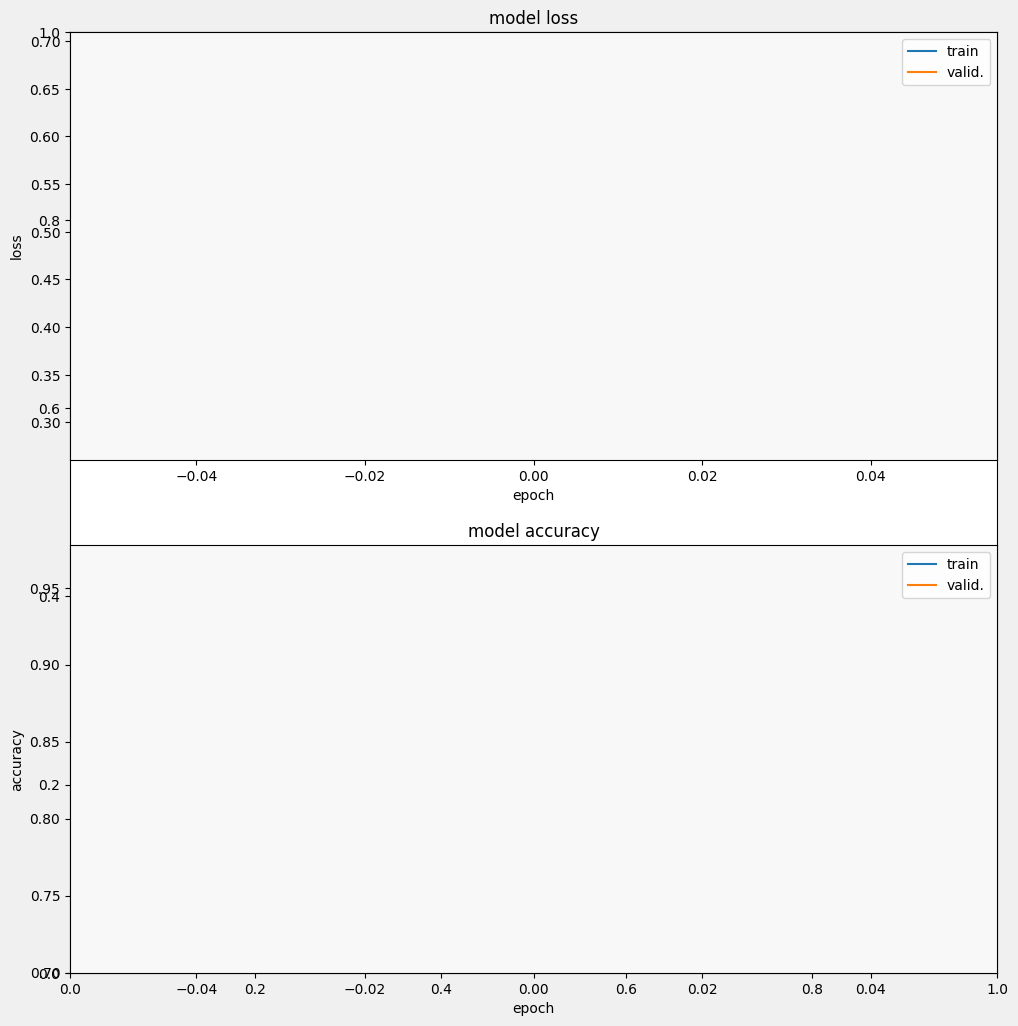

In [24]:
# Function to display training curves for loss and accuracy
def display_training_curves(training, validation, title, subplot):
    if subplot % 10 == 1:
        plt.subplots(figsize=(10, 10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# Display training curves for loss and accuracy
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 212)


In [28]:
# Save the trained model
model.save('E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\trained_lung_cancer_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
The image belongs to class: squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


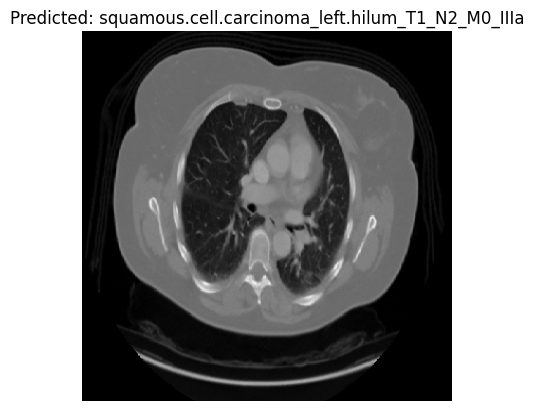

In [35]:
# Function to load and preprocess an image for prediction
from tensorflow.keras.preprocessing import image
import numpy as np

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image like the training images
    return img_array

# Load, preprocess, and predict the class of an image
img_path = 'E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\test\\adenocarcinoma\\000109 (2).png'
img = load_and_preprocess_image(img_path, IMAGE_SIZE)

# Make a prediction
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])

# Map the predicted class to the class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Print the predicted class
print(f"The image belongs to class: {predicted_label}")

# Display the image with the predicted class
plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image like the training images
    return img_array

# Load an image from your drive
img_path = 'E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\test\\large.cell.carcinoma\\000109 (2).png'
img = load_and_preprocess_image(img_path, IMAGE_SIZE)

# Make a prediction
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])

# Map the predicted class to the class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Print the predicted class
print(f"The image belongs to class: {predicted_label}")

# Display the image
plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mehul\AppData\Local\Temp\ipykernel_3796\3675382724.py", line 14, in <module>
    img = load_and_preprocess_image(img_path, IMAGE_SIZE)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mehul\AppData\Local\Temp\ipykernel_3796\3675382724.py", line 6, in load_and_preprocess_image
    img = image.load_img(img_path, target_size=target_size)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mehul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\image_utils.py", line 235, in load_img
FileNotFoundError: [Errno 2] No such file or directory: 'E:\\usueles but use full\\ayush\\Lung-Cancer-Prediction-using-CNN-and-Transfer-Learning-main\\dataset\\test\\large.cell.carcinoma\\000109 (

1/1 [==============================] - 1s 747ms/step
The image belongs to class: large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa


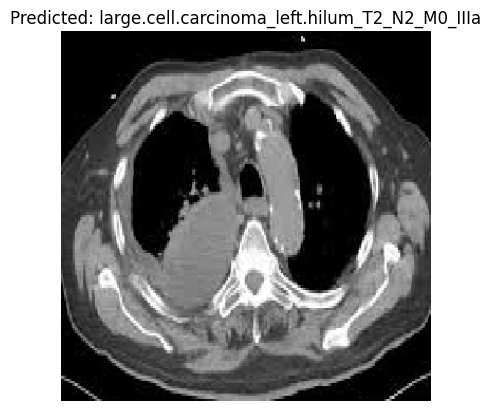

In [79]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image like the training images
    return img_array

# Load an image from your drive
img_path = '/content/l3.png'
img = load_and_preprocess_image(img_path, IMAGE_SIZE)

# Make a prediction
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])

# Map the predicted class to the class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Print the predicted class
print(f"The image belongs to class: {predicted_label}")

# Display the image
plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 1s 796ms/step
The image belongs to class: normal


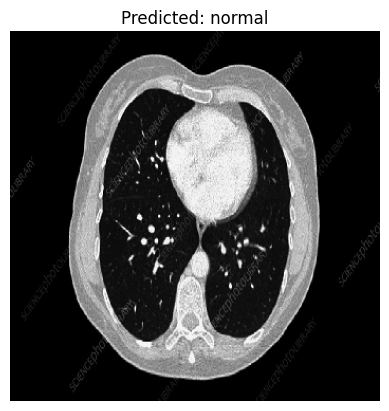

In [80]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image like the training images
    return img_array

# Load an image from your drive
img_path = '/content/n8.jpg'
img = load_and_preprocess_image(img_path, IMAGE_SIZE)

# Make a prediction
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])

# Map the predicted class to the class label
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Print the predicted class
print(f"The image belongs to class: {predicted_label}")

# Display the image
plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
